# Домашнее задание к семинару 05 (HW05)

Тема: линейные модели и честный ML-эксперимент (логистическая регрессия, бейзлайн, метрики).

## Импорт библиотек

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    RocCurveDisplay,
    PrecisionRecallDisplay,
    brier_score_loss,
)

## Загрузка данных и первичный анализ

In [7]:
data = pd.read_csv('data/S05-hw-dataset.csv')

In [8]:
data.head()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [9]:
data.shape

(3000, 17)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

In [11]:
data.isnull().sum()

client_id                         0
age                               0
income                            0
years_employed                    0
credit_score                      0
debt_to_income                    0
num_credit_cards                  0
num_late_payments                 0
has_mortgage                      0
has_car_loan                      0
savings_balance                   0
checking_balance                  0
region_risk_score                 0
phone_calls_to_support_last_3m    0
active_loans                      0
customer_tenure_years             0
default                           0
dtype: int64

In [12]:
data.describe()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


In [13]:
print(data['client_id'].duplicated().sum())

invalid_experience = data[data['years_employed'] >= data['age']]
print(len(invalid_experience))
# print(invalid_experience[['client_id', 'age', 'years_employed']].head())

invalid_tenure = data[data['customer_tenure_years'] >= data['age']]
print(len(invalid_tenure))


int_columns = [
    'num_credit_cards',
    'num_late_payments',
    'phone_calls_to_support_last_3m',
    'active_loans'
]
print("\nДробные значения в целочисленных колонках:")
for col in int_columns:
    if col in data.columns:
        # Проверяем, есть ли нецелые значения
        non_int_values = data[~data[col].apply(lambda x: float(x).is_integer() if pd.notnull(x) else True)]
        non_int_count = len(non_int_values)

        print(f"{col}: {non_int_count}")


print("\nБинарные колонки:")
binary_columns = ['has_mortgage', 'has_car_loan', 'default']
for col in binary_columns:
    if col in data.columns:
        unique_values = data[col].unique()
        print(f"{col}: {unique_values}")



0
295
0

Дробные значения в целочисленных колонках:
num_credit_cards: 0
num_late_payments: 0
phone_calls_to_support_last_3m: 0
active_loans: 0

Бинарные колонки:
has_mortgage: [0 1]
has_car_loan: [0 1]
default: [0 1]


In [14]:
data = data[data['years_employed'] < data['age']]

invalid_experience = data[data['years_employed'] >= data['age']]
print(len(invalid_experience))

0


In [15]:
data.shape

(2705, 17)

Класс 0: 1,587 (58.7%)
Класс 1: 1,118 (41.3%)


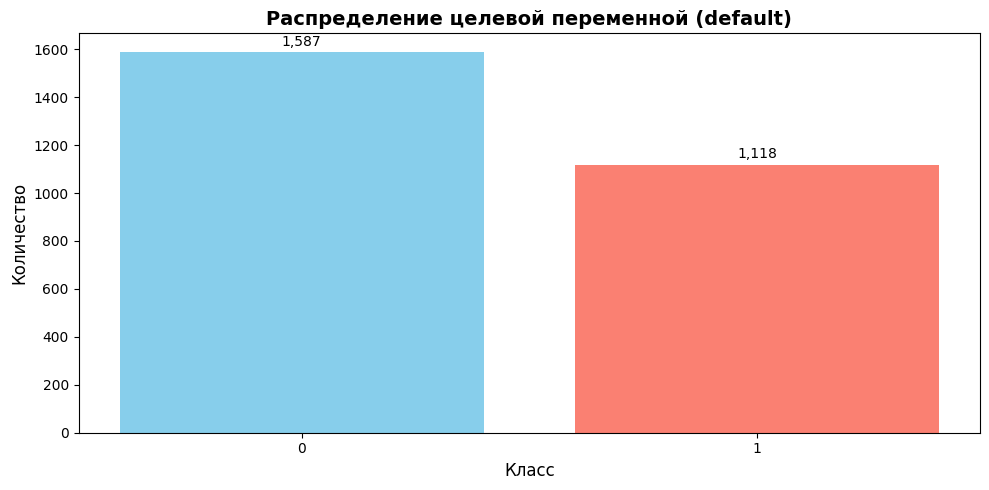

In [16]:
target_dist = data['default'].value_counts()

target_counts = data['default'].value_counts()
print(f"Класс 0: {target_counts[0]:,} ({target_counts[0]/len(data)*100:.1f}%)")
print(f"Класс 1: {target_counts[1]:,} ({target_counts[1]/len(data)*100:.1f}%)")

# Визуализация распределения целевой переменной
plt.figure(figsize=(10, 5))

bars = plt.bar(target_dist.index.astype(str), target_dist.values, color=['skyblue', 'salmon'])
plt.title('Распределение целевой переменной (default)', fontsize=14, fontweight='bold')
plt.xlabel('Класс', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.xticks([0, 1], ['0', '1'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01*max(target_dist.values),
             f'{height:,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Вывод: в датасете 3000 объектов и 16 признаков (исключая таргет). Присутствуют аномалии (стаж работы больше или равен возрасту). Аномальные объекты исключены из датасета.

После очистки осталось 2705 объектов. Таргет распределен нормально (58.7% vs 41.3%), немного больше объектов принадлежит 0 классу.

## Подготовка признаков и таргета


In [ ]:
y = data['default']

columns_to_exclude = ['client_id', 'default']
features = [col for col in data.columns.tolist() if col not in columns_to_exclude]

for i, col in enumerate(features, 1):
    print(f"{col:30} тип: {data[col].dtype}")

X = data[features]

age                            тип: int64
income                         тип: int64
years_employed                 тип: int64
credit_score                   тип: int64
debt_to_income                 тип: float64
num_credit_cards               тип: int64
num_late_payments              тип: int64
has_mortgage                   тип: int64
has_car_loan                   тип: int64
savings_balance                тип: int64
checking_balance               тип: int64
region_risk_score              тип: float64
phone_calls_to_support_last_3m тип: int64
active_loans                   тип: int64
customer_tenure_years          тип: int64


## Train/Test-сплит и бейзлайн-модель

In [19]:
RANDOM_STATE = 42

In [20]:
# 1. Отделяем тестовую выборку (например, 20% данных)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,          # сохраняем долю классов
    random_state=RANDOM_STATE,
)

print("Размеры выборок:")
print("  X_train:", X_train.shape)
print(" X_test:  ", X_test.shape)
print(f"  y_train: {y_train.shape}")
print(f"  y_test:  {y_test.shape}")

print("\nРаспределение классов (train):")
print(y_train.value_counts(normalize=True))

print("\nРаспределение классов (test):")
print(y_test.value_counts(normalize=True))

Размеры выборок:
  X_train: (2164, 15)
 X_test:   (541, 15)
  y_train: (2164,)
  y_test:  (541,)

Распределение классов (train):
default
0    0.586876
1    0.413124
Name: proportion, dtype: float64

Распределение классов (test):
default
0    0.585952
1    0.414048
Name: proportion, dtype: float64


In [21]:
# Бейзлайн-модель: ничего "умного", просто предсказываем самый частый класс (или случайно)
baseline = DummyClassifier(strategy="most_frequent", random_state=RANDOM_STATE)

# Обучаем только на train
baseline.fit(X_train, y_train)

# Оцениваем на test
y_pred_dum = baseline.predict(X_test)
y_proba_dum = baseline.predict_proba(X_test)[:, 1]

print("=== Бейзлайн (DummyClassifier, most_frequent) – качество на validation ===")
print("Accuracy :", accuracy_score(y_test, y_pred_dum))
print("Precision:", precision_score(y_test, y_pred_dum, zero_division=0))
print("Recall   :", recall_score(y_test, y_pred_dum, zero_division=0))
print("F1-score :", f1_score(y_test, y_pred_dum, zero_division=0))

# Для ROC-AUC нам нужны вероятности положительного класса
try:
    print("ROC-AUC  :", roc_auc_score(y_test, y_proba_dum))
except ValueError as e:
    print("Не удалось посчитать ROC-AUC для бейзлайна:", e)

=== Бейзлайн (DummyClassifier, most_frequent) – качество на validation ===
Accuracy : 0.5859519408502772
Precision: 0.0
Recall   : 0.0
F1-score : 0.0
ROC-AUC  : 0.5


Метрики:
- accuracy – доля правильных ответов;
- precision – из всех предсказанных «положительных» объектов сколько действительно положительные;
- recall – из всех реально положительных сколько модель поймала;
- f1 – компромисс между precision и recall;
- ROC-AUC – площадь под ROC-кривой, показывает, насколько хорошо модель ранжирует объекты.

Бейзлайн (baseline) - это простая модель, которая служит точкой отсчёта для оценки качества более сложных моделей машинного обучения. Это задает нижнюю планку качества.

Бейзлайн модель всегда предсказывает самый частый класс - это класс 0.
Поэтому точность (Accuracy) соответствует доле объектов класса 0 в выборке.

Для класса 0 модель предсказывает вероятность ~1. Для класса 1 модель предсказывает вероятность ~0. Это случайное угадывание, поэтому ROC-AUC = 0.5.



## Логистическая регрессия и подбор гиперпараметров

In [22]:
# Собираем Pipeline:
# 1) Масштабирование признаков (StandardScaler)
# 2) Логистическая регрессия
log_reg_pipeline = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "logreg",
            LogisticRegression(
                penalty="l2",
                C=1.0,              # сила регуляризации (чем меньше C, тем сильнее регуляризация)
                solver="liblinear", # надёжный солвер для маленьких датасетов
                random_state=RANDOM_STATE,
            ),
        ),
    ]
)

# Обучаем pipeline на train
log_reg_pipeline.fit(X_train, y_train)

# Предсказываем на validation
y_pred_lr = log_reg_pipeline.predict(X_test)
y_proba_lr = log_reg_pipeline.predict_proba(X_test)[:, 1]

print("=== Логистическая регрессия (C=1.0) – качество на validation ===")
print("Accuracy :", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr, zero_division=0))
print("Recall   :", recall_score(y_test, y_pred_lr, zero_division=0))
print("F1-score :", f1_score(y_test, y_pred_lr, zero_division=0))
print("ROC-AUC  :", roc_auc_score(y_test, y_pred_lr))

=== Логистическая регрессия (C=1.0) – качество на validation ===
Accuracy : 0.7504621072088724
Precision: 0.7354497354497355
Recall   : 0.6205357142857143
F1-score : 0.6731234866828087
ROC-AUC  : 0.7314035038305544


In [23]:
# Настроим сетку по параметру C (сила регуляризации)
param_grid = {
    "logreg__C": [0.01, 0.1, 1.0, 10.0, 100.0],
}

# GridSearchCV будет:
# - внутри делать кросс-валидацию по train
# - выбирать лучший C по заданной метрике (например, ROC-AUC).
grid_search = GridSearchCV(
    estimator=log_reg_pipeline,
    param_grid=param_grid,
    scoring="accuracy",    # можно поменять на f1, recall и т.д.
    cv=5,
    n_jobs=-1,
    verbose=1,
)

grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая accuracy (по CV):", grid_search.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Лучшие параметры: {'logreg__C': 0.01}
Лучшая accuracy (по CV): 0.8073015567530579


In [24]:
# Берём лучшую найденную модель
best_model = grid_search.best_estimator_

# Оцениваем на test
y_pred_best_lr = best_model.predict(X_test)
y_proba_best_lr = best_model.predict_proba(X_test)[:, 1]

print("\n=== Лучшая модель – качество на test ===")
print("Accuracy :", accuracy_score(y_test, y_pred_best_lr))
print("Precision:", precision_score(y_test, y_pred_best_lr, zero_division=0))
print("Recall   :", recall_score(y_test, y_pred_best_lr, zero_division=0))
print("F1-score :", f1_score(y_test, y_pred_best_lr, zero_division=0))
print("ROC-AUC  :", roc_auc_score(y_test, y_proba_best_lr))


=== Лучшая модель – качество на test ===
Accuracy : 0.7504621072088724
Precision: 0.7379679144385026
Recall   : 0.6160714285714286
F1-score : 0.6715328467153284
ROC-AUC  : 0.8388350608382154


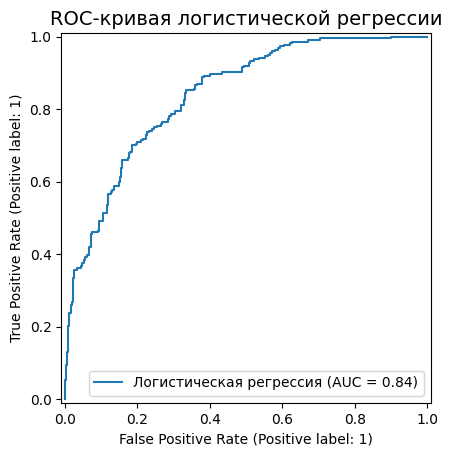

In [26]:
roc_display = RocCurveDisplay.from_predictions(
    y_test,
    y_proba_best_lr,  # вероятности положительного класса
    name="Логистическая регрессия"
)
plt.title("ROC-кривая логистической регрессии", fontsize=14)

plt.savefig('figures/roc_curve.png', dpi=300, bbox_inches='tight')

plt.show()

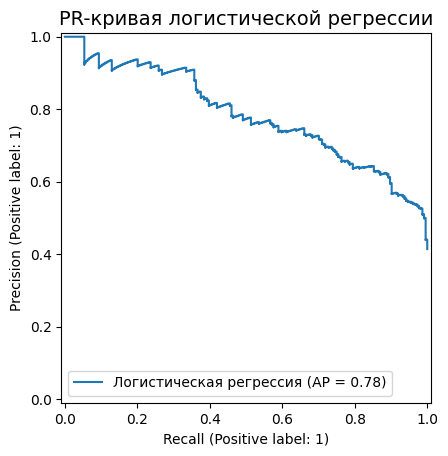

In [27]:
pr_display = PrecisionRecallDisplay.from_predictions(
    y_test,
    y_proba_best_lr,  # вероятности положительного класса
    name="Логистическая регрессия"
)
plt.title("PR-кривая логистической регрессии", fontsize=14)

plt.savefig('figures/pr_curve.png', dpi=300, bbox_inches='tight')

plt.show()

## Сравнение бейзлайна и логистической регрессии, текстовые выводы

In [28]:
comparison_data = {
    'Модель': ['Бейзлайн (Dummy)', 'Логистическая регрессия с GridSearchCV'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_dum),
        accuracy_score(y_test, y_pred_best_lr)
    ],
    'ROC-AUC': [
        roc_auc_score(y_test, y_proba_dum),
        roc_auc_score(y_test, y_proba_best_lr)
    ],
    'Precision': [
        precision_score(y_test, y_pred_dum, zero_division=0),
        precision_score(y_test, y_pred_best_lr, zero_division=0)
    ],
    'Recall': [
        recall_score(y_test, y_pred_dum, zero_division=0),
        recall_score(y_test, y_pred_best_lr, zero_division=0)
    ],
    'F1-score': [
        f1_score(y_test, y_pred_dum, zero_division=0),
        f1_score(y_test, y_pred_best_lr, zero_division=0)
    ]
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.round(4)

# Красиво выводим таблицу
print(comparison_df.to_string(index=False))

                                Модель  Accuracy  ROC-AUC  Precision  Recall  F1-score
                      Бейзлайн (Dummy)    0.5860   0.5000      0.000  0.0000    0.0000
Логистическая регрессия с GridSearchCV    0.7505   0.8388      0.738  0.6161    0.6715


In [29]:
# Получаем результаты кросс-валидации
cv_results = pd.DataFrame(grid_search.cv_results_)

# Создаем таблицу результатов по разным C
c_results = cv_results[['param_logreg__C', 'mean_test_score', 'std_test_score']].copy()
c_results.columns = ['C', 'ROC-AUC (CV)', 'Станд. отклонение']
c_results = c_results.sort_values('C')
c_results = c_results.round(4)

print("Результаты кросс-валидации для разных значений C:")
print(c_results.to_string(index=False))

Результаты кросс-валидации для разных значений C:
     C  ROC-AUC (CV)  Станд. отклонение
  0.01        0.8073             0.0059
  0.10        0.8050             0.0059
  1.00        0.8050             0.0059
 10.00        0.8055             0.0063
100.00        0.8055             0.0063


Бейзлайн модель всегда предсказывает самый частый класс - это класс 0. Поэтому точность (Accuracy) соответствует доле объектов класса 0 в выборке: 0.5860. ROC-AUC: 0.5000. Ее вывод не зависит от признаков объектов.

Логистическая регрессия обучается на признаках объектов и минимизирует функцию потерь, показывая точность: 0.7505. ROC-AUC: 0.8388.

Разница accuracy: 0.1645.
Разница ROC_AUC: 0.3388.

Изменение регуляризации немного улучшило качество. При C = 0.01, ROC-AUC = 0.8073. При C = 1.00, ROC-AUC = 0.8050.

Логистическая регрессия с GridSearchCV является самой подходящей моделью для данной задачи, так как она проста, интерпретируема и показывает хорошее качество.